# Read EXPERT
For highlighting main events

In [1]:
%run common.py

import matplotlib.pyplot as plt
import locale
#locale.setlocale(locale.LC_TIME, 'en_US.UTF-8')

print(locale.getlocale())

eng_co=sa.create_engine('sqlite+pysqlite:///eco_words.sqlite3')#, echo=True)
stop_w.update(['т.', 'д.', 'д..', 'ъ', 'это', 'тыс', 'руб', 'году', 'год', 'года', 'который', 
               'которому', 'которая', 'которым', 'которыми', 'считает', 'говорит'])

def update_stop_words():
    lst_txt_files=glob.glob('4text/*.txt')
    stopd_words_ru=set()

    for f in lst_txt_files:
        with open(f, 'r') as sw_file:
            stopd_words_ru.update(sw_file.read().split('\n'))


    stop_words2={w for w in stopd_words_ru if w.find(' ') > 0}
    return {w for w in stopd_words_ru if w not in stop_words2}, stop_words2

stop_w1, stop_w2=update_stop_words()

remove_stop_words2=re.compile(r'(?i)' + '|'.join({ r'(\b{}\b)'.format(w) for w in stop_w2}))
stop_w.update(stop_w1)
#print(stop_w)

%matplotlib notebook

('ru_RU', 'UTF-8')


In [8]:
dt_now=datetime.now()
dt_delta=timedelta(days=31)
dt_high_level=dt_now+dt_delta
print(dt_high_level)
dateFilter=pd.date_range(start='{year}-{month}-{day}'.format(year=dt_now.year, month=dt_now.month, day=1),
                                      end='{year}-{month}-{day}'.format(year=dt_high_level.year, 
                                                                        month=dt_high_level.month, day=1))
print(dateFilter)

2019-01-03 14:02:58.626440
DatetimeIndex(['2018-12-01', '2018-12-02', '2018-12-03', '2018-12-04',
               '2018-12-05', '2018-12-06', '2018-12-07', '2018-12-08',
               '2018-12-09', '2018-12-10', '2018-12-11', '2018-12-12',
               '2018-12-13', '2018-12-14', '2018-12-15', '2018-12-16',
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-22', '2018-12-23', '2018-12-24',
               '2018-12-25', '2018-12-26', '2018-12-27', '2018-12-28',
               '2018-12-29', '2018-12-30', '2018-12-31', '2019-01-01'],
              dtype='datetime64[ns]', freq='D')


## expert.ru
http://expert.ru/dossier/podrubrika/economics/

In [9]:
strExpert=r'http://expert.ru/dossier/podrubrika/economics/'

expert=ArticlesDataFrame(pd.DataFrame(get_expert_ribbon()).set_index('title'))
expert['date']=expert['date'].dt.strftime('%d-%m-%Y')
expert.to_sql('EXPERT', con=eng_co, if_exists='upsert')

print(expert.shape)

# нужно установить правило апдейта базы: может быть обновлять только те позиции, у которых num=None

Done for  Минэнерго сообщило о нейропрогнозе нефтяных цен
Done for  Преемница Меркель хочет закрыть порты для российских судов
Done for  Китай-США: перемирие до весны
Done for  Рынок гособлигаций: без паники
Done for  Рокетбанк похудел при переезде
Done for  Инвестировать в молоко выгодно
Done for  Нефть расскажет о себе
Done for  Familia: прийти и найти сокровище
Done for  Центр притяжения номер два
Done for  Плохо скрытая угроза
Done for  Почему падает «яблоко»
Done for  РЫНОК
Done for  ТРЕНДЫ
Done for  Крупнейшие банки сражаются за вкладчика
Done for  Российские нефтяники позволяют Москве вести переговоры с позиции силы
Done for  ЦБ: главные угрозы для экономики РФ не связаны с нефтью
Done for  «Россети» работают на капитализацию
Done for  Путин: темпы роста российской экономики недостаточны
Done for  WSJ: Россия сейчас главный игрок
Done for  Ситуация с кредитованием в России может выйти из-под контроля
Done for  Нефтяное благополучие России под угрозой
Done for  Плюс дегазификация

In [10]:
print(expert.columns)
print(expert.loc[:'РЫНОК', ['rubrica', 'num']])

Index(['cuts', 'date', 'heads', 'link', 'num', 'rubrica', 'short', 'text'], dtype='object')
                                                                       rubrica  \
title                                                                            
Минэнерго сообщило о нейропрогнозе нефтяных цен                          Нефть   
Преемница Меркель хочет закрыть порты для росси...  Санкции в отношении России   
Китай-США: перемирие до весны                                     Китай vs США   
Рынок гособлигаций: без паники                                            None   
Рокетбанк похудел при переезде                                           Банки   
Инвестировать в молоко выгодно                                          Молоко   
Нефть расскажет о себе                                                   Нефть   
Familia: прийти и найти сокровище                           Розничная торговля   
Центр притяжения номер два                                        Недвижимость   
Плохо 

### Expert from Database (for text analisys)

In [11]:
expert_db=pd.read_sql('EXPERT', con=eng_co)
expert_db['date']=pd.to_datetime(expert_db['date'], format='%d-%m-%Y')
expert_db=expert_db[expert_db['date'].isin(dateFilter)]
expert_db['text']=expert_db['text'].str.split('\n')
print(expert_db.shape)

(22, 9)


In [12]:
iLoc2=23

expert_items_df=pd.concat([make_exp_items_df(*r[['link', 'text']], 'EXPERT') for _, r in expert_db.iterrows()])
expert_items_df.reset_index(drop=True)


,abr_eng,abr_ru,ends,link,name,quoted,sents
0,[Brent],"[Института, ИЭС, Минэнерго РФ, Минэнерго РФ]","[., .]",http://expert.ru/2018/12/3/nejroneft/,EXPERT,[],[Согласно прогнозу Института энергетической ст...
1,[],"[Институт, ИЭС, Университета Дубны]","[., .]",http://expert.ru/2018/12/3/nejroneft/,EXPERT,[],"[Прогноз примечателен тем, что Институт энерге..."
2,[],"[Энергетической, России]","[., ., .]",http://expert.ru/2018/12/3/nejroneft/,EXPERT,[координационно-аналитическим центром по разра...,"[Как утверждается, с ее помощью были предсказа..."
3,[],"[Брокер, Алексей Антонов]","[., .]",http://expert.ru/2018/12/3/nejroneft/,EXPERT,"[Алор Брокер, нейросеть]",[Как считает аналитик «Алор Брокер» Алексей Ан...
4,[],[Институту],"[., ., ., ., .]",http://expert.ru/2018/12/3/nejroneft/,EXPERT,[с помощью этой модели были заранее предсказан...,"[Как говорится в сообщении, «с помощью этой мо..."
5,[],[Алексей Антонов],"[., ., ., ., .]",http://expert.ru/2018/12/3/nejroneft/,EXPERT,"[обучаются, черные лебеди]","[Нужно понимать природу нейросетей, они «обуча..."
6,[Brent],"[Алексей Антонов, Катар, ОПЕК, Ирана, Азии, Ки...","[., .]",http://expert.ru/2018/12/3/nejroneft/,EXPERT,[],[Говоря о прогнозе стоимости барреля на уровне...
7,[],[Анна Бодрова],"[., ., ., .]",http://expert.ru/2018/12/3/nejroneft/,EXPERT,"[Альпари, короткий]","[Усредненные прогнозы на большом таймфрейме, о..."
8,[Brent],[Анны Бодровой],"[., .]",http://expert.ru/2018/12/3/nejroneft/,EXPERT,[],"[В целом же, уверена аналитик, нет ничего плох..."
9,[Reuters],"[Аннегрет Крамп, Германии, ФРГ «должна, Крамп-...","[., ?, .]",http://expert.ru/2018/12/3/preemnitsa-merkel-h...,EXPERT,[должна быть готова взять на себя больше ответ...,[Как заявила в интервью агентству Reuters Анне...


### Simple cloud

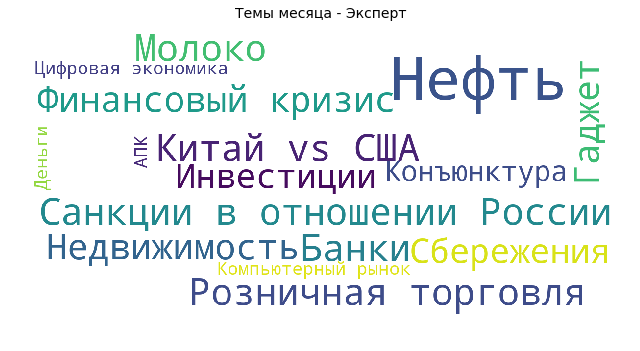

<Figure size 432x288 with 0 Axes>

In [13]:
fdist=nltk.FreqDist(expert_db.loc[expert_db['rubrica'].notnull(), 'rubrica'])
show_cloud(freq_array=fdist, 
           title='Темы месяца - Эксперт', max_words=50, fig_size=(9, 5), filename='expert.png')

In [188]:
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

rstemm=SnowballStemmer('russian')
from wiki_ru_wordnet import WikiWordnet
wikiwordnet = WikiWordnet()


In [189]:
def get_freq_words(item):
    def freq_dict(otext):
        dict_item_stem=dict()

        for w in otext:
            try:
                lst=dict_item_stem[rstemm.stem(w.lower())]
                lst.append(w)
                dict_item_stem[rstemm.stem(w.lower())]=lst
            except:
                dict_item_stem.setdefault(rstemm.stem(w.lower()), [w])
        return dict_item_stem
                                    
    text=nltk.Text(nltk.word_tokenize('\n'.join(item)))
    list_words=[w for w in text if w.lower() not in stop_w and w.isalpha()]
    
    dct=freq_dict(list_words)
    item_lst=[rstemm.stem(w.lower()) for w in list_words]
    
    fdist_new={nltk.FreqDist(dct[i[0].lower()]).most_common(1)[0][0]: i[1] 
               for i in nltk.FreqDist(item_lst).most_common(50)}
    return fdist_new

#print(get_freq_words(expert_db.iloc[2]['text']))
freq_dist=get_freq_words(['\n'.join(t) for t in expert_db['text']])


In [190]:
wnl=WordNetLemmatizer()
for r, v in freq_dist.items():
    synsets = wikiwordnet.get_synsets(r)
    print(r)
    for synset in synsets:
         print({w.definition() for w in synset.get_words()})

компании
рынка
России
которые
российского
рост
{'рост~ru~рост~ru~высота стоящего человека или животного {{пример|Человек высокого {{выдел|роста}}.}}~88878~32269'}
{'рост~ru~рост~ru~увеличение размера живого организма в ходе его развития {{пример|По мере взросления {{выдел|рост}} тела прекращается.}}~94341~38653', 'развитие~ru~развитие~ru~{{действие|развивать|}}; [[изменение]], как правило, приводящее к росту объекта, его усилению или усложнению его устройства, а иногда и к полному перерождению {{пример|}}~39424~56576'}
{'возрастание~ru~возрастание~ru~{{действие|возрастать}} {{пример|}}~33055~65063', 'увеличение~ru~увеличение~ru~{{действие|увеличивать}}, [[увеличить]], [[увеличиться]], [[увеличиваться]] рост, прибавление в величине, размерах, объёме и т. п. {{пример|Практическим результатом интенсивной разведки явилось резкое {{выдел|увеличение}} запасов хризотил-асбеста, главным образом за счёт глубоких горизонтов месторождения.|А. А. Антонов|Минералогия родингитов Баженовского гиперба

<IPython.core.display.Javascript object>


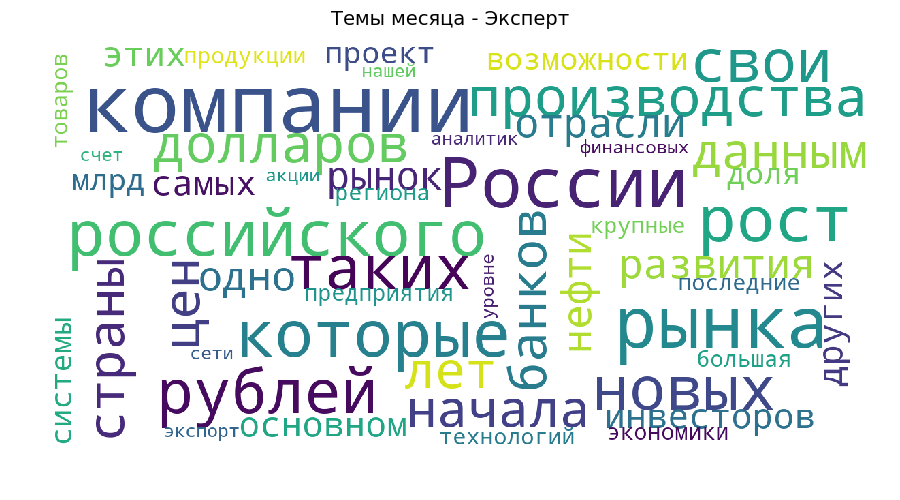

In [191]:
show_cloud(freq_array=freq_dist, 
           title='Темы месяца - Эксперт', max_words=50, fig_size=(9, 5))

In [192]:
tags=nltk.pos_tag(text, lang='rus')
print([t for t in tags if t[1] in ['S', 'V']])
print({t[1] for t in tags})

[('заводе', 'S'), ('началась', 'V'), ('сборка', 'S'), ('элементов', 'S'), ('планера', 'S'), ('лайнера', 'S'), ('Ил-96-400М', 'S'), ('сообщило', 'V'), ('ноября', 'S'), ('агентство', 'S'), ('РИА', 'S'), ('Новости', 'S'), ('ссылкой', 'S'), ('пресс-службу', 'S'), ('комплекса', 'S'), ('им', 'S'), ('С.В', 'S'), ('Ильюшина', 'S'), ('аэробус', 'S'), ('будет', 'V'), ('иметь', 'V'), ('сравнению', 'S'), ('Ил-96', 'S'), ('фюзеляж', 'S'), ('двигатели', 'S'), ('ПС-90А1', 'S'), ('ПС-90А', 'S'), ('завершающей', 'V'), ('стадии', 'S'), ('находятся', 'V'), ('работы', 'S'), ('разработке', 'S'), ('документации', 'S'), ('осуществляется', 'V'), ('сборка', 'S'), ('элементов', 'S'), ('планера', 'S'), ('идет', 'V'), ('контрактация', 'S'), ('изделиям', 'S'), ('сообщили', 'V'), ('компании', 'S'), ('входящей', 'V'), ('дивизион', 'S'), ('авиации', 'S'), ('корпорации', 'S'), ('ОАК', 'S'), ('Ил-96-400М', 'S'), ('может', 'V'), ('взять', 'V'), ('борт', 'S'), ('пассажиров', 'S'), ('зависимости', 'S'), ('компоновки', 'S'

In [182]:
tags

[('На', 'PR'),
 ('Воронежском', 'A=m'),
 ('авиационном', 'A=m'),
 ('заводе', 'S'),
 ('началась', 'V'),
 ('сборка', 'S'),
 ('элементов', 'S'),
 ('планера', 'S'),
 ('первого', 'ANUM=m'),
 ('широкофюзеляжного', 'A=m'),
 ('дальнемагистрального', 'A=m'),
 ('лайнера', 'S'),
 ('Ил-96-400М', 'S'),
 (',', 'NONLEX'),
 ('сообщило', 'V'),
 ('20', 'NUM=ciph'),
 ('ноября', 'S'),
 ('агентство', 'S'),
 ('РИА', 'S'),
 ('Новости', 'S'),
 ('со', 'PR'),
 ('ссылкой', 'S'),
 ('на', 'PR'),
 ('пресс-службу', 'S'),
 ('Авиационного', 'A=m'),
 ('комплекса', 'S'),
 ('им', 'S'),
 ('.', 'NONLEX'),
 ('С.В', 'S'),
 ('.', 'NONLEX'),
 ('Ильюшина', 'S'),
 ('.', 'NONLEX'),
 ('Новый', 'A=m'),
 ('российский', 'A=m'),
 ('аэробус', 'S'),
 ('будет', 'V'),
 ('иметь', 'V'),
 ('удлиненный', 'A=m'),
 (',', 'NONLEX'),
 ('по', 'PR'),
 ('сравнению', 'S'),
 ('с', 'PR'),
 ('серийным', 'A=m'),
 ('Ил-96', 'S'),
 ('фюзеляж', 'S'),
 ('и', 'CONJ'),
 ('более', 'ADV'),
 ('мощные', 'A=pl'),
 ('двигатели', 'S'),
 ('ПС-90А1', 'S'),
 ('взамен', 